<a href="https://colab.research.google.com/github/meyounge/MAT422/blob/main/MAT_422_HM4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 2.2

##2.2.1. Probability axioms
The first axiom states that the probability of an event will always be a non-negative real number

The second axiom states that the probability that at least one of the events in the entire sample space will occur is 1.

The third axiom states that for any countable sequence of disjoint sets (synonymous with mutually exclusive events) the probability of the union of all events is equal to the sum of all probabilities of all events

In [ ]:
# set of events : poker hand of five cards
# calculate all possible combinations of five cards in a standard deck of 52
import numpy as np
from scipy.special import factorial

def combination(n, k):
  return factorial(n) / (factorial(k) * factorial(n - k))

total_combinations_of_hands = combination(52, 5) # 52 cards, choose 5

print("total number of possible hands: %d"%(total_combinations_of_hands))
print("Probability of drawing a Royal Flush: %.7f%%"%(100 * 4 / total_combinations_of_hands))
print("Probability of drawing Four of a Kind: %.7f%%"%(100 * (13 * 48) / total_combinations_of_hands))

total number of possible hands: 2598960
Probability of drawing a Royal Flush: 0.0001539%
Probability of drawing Four of a Kind: 0.0240096%


##2.2.2. Conditional probability

In a deck of 52 playing cards, two cards are drawn one after the other without replacement. What is the probability that the second card drawn is a heart, given that the first card drawn was a spade?

P(A | B) = P(A ∩ B) / P(B) and P(A ∩ B) = P(B | A) * P(B)

In [33]:
prob_of_heart = 1/4 #A
prob_of_spade = 1/4 #B

prob_A_given_B = 13/51
prob_A_intersect_B = prob_A_given_B * prob_of_spade
#prob_A_given_B = prob_A_intersect_B * prob_of_spade

print("Probability of drawing a heart given a spade: %.3f%%"%prob_A_given_B)
print("Probability of the intersection of A and B: %.3f%%"%prob_A_intersect_B)

import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data setup
total_participants = 1000
likes = ['pizza', 'hotdogs', 'carrots', 'strawberries', 'donuts', 'burgers', 'watermelon']
age_ranges = ['6-10', '11-14', '15-19', '20-24', '25-29']

# Generate random data for participants
data = {
    'age_range': [random.choice(age_ranges) for _ in range(total_participants)],
    'favorite_food': [random.choice(likes) for _ in range(total_participants)]
}

# Create DataFrame
df = pd.DataFrame(data)

# Count occurrences of favorite foods in each age range
food_preferences_by_age = df.groupby(['age_range', 'favorite_food']).size().unstack().fillna(0)

# Sort by age
food_preferences_by_age = food_preferences_by_age.reindex(age_ranges)
#food_preferences_by_age.loc['Total'] = food_preferences_by_age.sum()

print(food_preferences_by_age)

B = food_preferences_by_age['burgers'].sum() / total_participants
print("probability of liking burgers: %.3f%%"%B)

AgB = food_preferences_by_age['burgers']['6-10'] / food_preferences_by_age['burgers'].sum()
print("probability of being 6-10 given they like burgers: %.3f%%"%(AgB))

AiB = food_preferences_by_age['burgers']['6-10'] / total_participants
print("probability of age 6-10 intersect age burgers: %.3f%%"%(AiB))

print()
print("test the rules")
print("probability of A given B: %.3f%%"%(AiB / B))
print("probability of A intersect B: %.3f%%"%(AgB * B))


Probability of drawing a heart given a spade: 0.255%
Probability of the intersection of A and B: 0.064%
favorite_food  burgers  carrots  donuts  hotdogs  pizza  strawberries  \
age_range                                                               
6-10                26       33      25       27     45            35   
11-14               30       38      26       29     33            22   
15-19               28       28      26       32     22            32   
20-24               32       25      26       29     34            33   
25-29               24       18      33       31     25            18   

favorite_food  watermelon  
age_range                  
6-10                   25  
11-14                  36  
15-19                  24  
20-24                  25  
25-29                  25  
probability of liking burgers: 0.140%
probability of being 6-10 given they like burgers: 0.186%
probability of age 6-10 intersect age burgers: 0.026%

test the rules
probability of A given

#2.2.3. Discrete random variables

Plot the pdf of a discrete random variable for a normal distribution

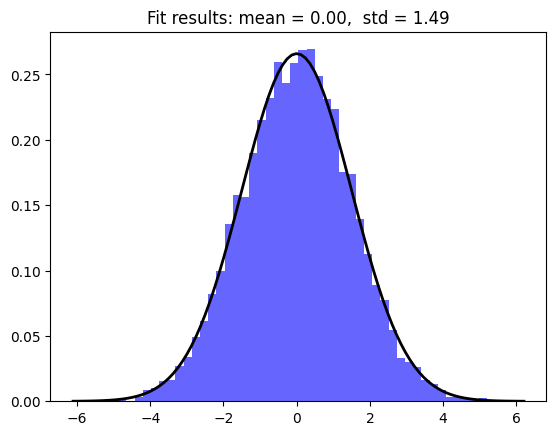

In [82]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Generate random variates
deviation = 1.5
data_normal = norm.rvs(size=10000, loc=0, scale=deviation)

# Plot the histogram of the generated data
plt.hist(data_normal, bins=50, density=True, alpha=0.6, color='b')

# Plot the probability density function (PDF)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, loc=0, scale=deviation)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mean = %.2f,  std = %.2f" % (np.mean(data_normal), np.std(data_normal))
plt.title(title)

plt.show()


Intel is makes thousands of chips, but many of those chips never make it to market due to defects. Over the course of 100 different wafers, each with 1000 dyes, there lies a random number of defective dyes. What is the expected value of defective dyes on the chip.

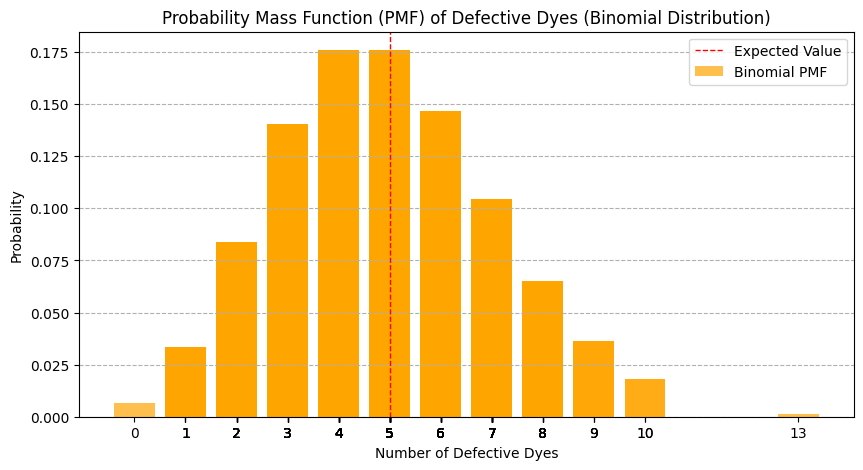

Expected value of defective dyes (Binomial): 5.0


In [86]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, binom

# Binomial Distribution
num_of_wafers = 100
num_dyes_per_wafer = 1000
probability_defect = 0.005  # Probability of a dye being defective
x_binomial = np.random.binomial(num_dyes_per_wafer, probability_defect, num_of_wafers)


# Calculate the PMF for Binomial distribution
binomial_pmf = binom.pmf(x_binomial, num_dyes_per_wafer, probability_defect)

# Calculate expected value for Binomial
expected_value_binomial = num_dyes_per_wafer * probability_defect

# Plot the PDF for Binomial
plt.figure(figsize=(10, 5))
plt.bar(x_binomial, binomial_pmf, width=0.8, color='orange', alpha=0.7, label='Binomial PMF')
plt.axvline(expected_value_binomial, color='red', linestyle='dashed', linewidth=1, label='Expected Value')
plt.title('Probability Mass Function (PMF) of Defective Dyes (Binomial Distribution)')
plt.xlabel('Number of Defective Dyes')
plt.ylabel('Probability')
plt.xticks(x_binomial)
plt.grid(axis='y', linestyle='--')
plt.legend()
plt.show()

print("Expected value of defective dyes (Binomial):", expected_value_binomial)




##2.2.4. Continues random variables

Wave funtions are probability function too, in fact they are the only true random variables that exist

From my quantum mechanics class: Ψ(x, t) = {Ax/a if 0 <= x <= a, A(b-x)/(b-a) if a <= x <= b, 0 else}
Find A and graph both the wave and probability functions

800
1.0


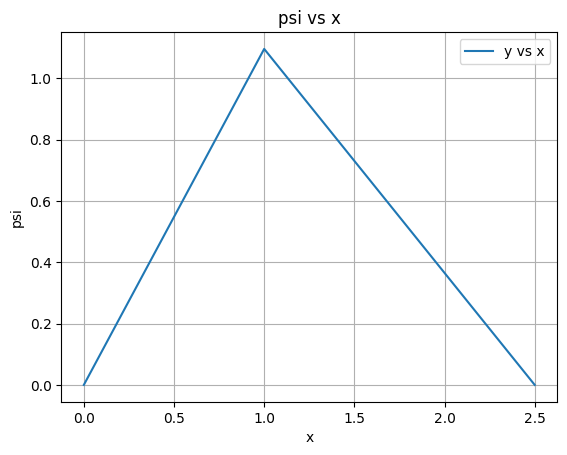

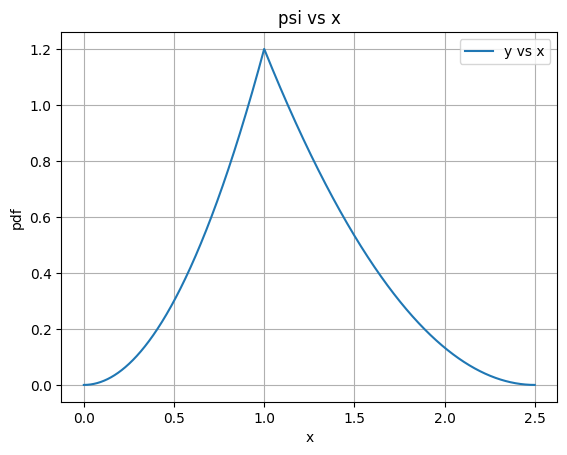

Integral of the pdf:  1.0000005208333334


In [76]:
a = 1
b = 2.5
points = 2001
x = np.linspace(0, b, points)

A = np.sqrt(3/b) #this was done on a sheet of paper

delta = b / points

break_index = np.where(x >= a)[0][0]
print(break_index)
print(x[break_index])

y1 = A * x[:break_index] / a
y2 = A * (b - x[break_index:]) / (b - a)

y = np.concatenate((y1, y2))

# Plot the graph
plt.plot(x, y, label='y vs x')
plt.title('psi vs x')
plt.xlabel('x')
plt.ylabel('psi')
plt.legend()
plt.grid(True)
plt.show()

# plot pdf

F = y**2
# Plot the graph
plt.plot(x, F, label='y vs x')
plt.title('psi vs x')
plt.xlabel('x')
plt.ylabel('pdf')
plt.legend()
plt.grid(True)
plt.show()

# show that the integral of the pdf = 1
print("Integral of the pdf: ",np.trapz(F, x = x))
